<a href="https://colab.research.google.com/github/srinivasanibmbangalore/Deep-Learning2/blob/Version-1/Perceptron_March26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Perceptron Model***: **Task** is a binary Classification
Data :  Breast Cancer Data Set from Scikit learn library.
**Algorithm (Model)** 
$y=1, \mbox{if} \sum_i w_i x_i >= b$

$y=0, \mbox{otherwise}\$

$w_i$ is the vector of weights

The number of parameters for the learning algorithm to learn include n+1 where n is the number of features

Unlike a MP Neuron based model, $x_i$ can be real valued

Loss = 0 if y^=y otherwise 1

The learning algorithm learns $w_i$ and b

###Learning Algorithm
P <-- Inputs with ground truth label =1

N <-- Inputs with ground Truth label = 0


Initialize $w$ randomly

while !convergence do 

    pick a random x in (P U N):

        if x in (P) and $\sum_i wi xi $ <0 then 

            w = w+x

        end

        else if x in (N) and $\sum_i wi xi$ > 0 then

            w = w-x

        end

Algorithm converges when all inputs are classified correctly



### The Intution Behind the Learning Algorithm

X=[x1,x2,x3,x4....] and W=[w1,w2,w3,w4...]

Angle between X and W is given by cos($\theta$) = (W.X)/(||W||.||X||)

It needs to be noted that the denominator (||W||.||X||) is allways positive

Hence angle between the vector is dependent on the sign of the dot products between the vectors


cos($\theta$) is Zero when $\theta$ is 90 degree

cos($\theta$) is 1 when $\theta$ is 0

cos(($\theta$) is <0 when $\theta$ > 90 and <180

It needs to noted from the learning algorithm that

𝑦=1,if $\sum w_i x_i $ 𝑖>=𝑏

So if y is positive and $\sum w_i x_i$ tends to be negative, then the intution is angle between the two vectors (x and w)  is negative and hence it has to be made tending towards acute. This can be achieved by increasing the weight vector w (i.e w = w+x)


So if y is negative  and $\sum w_i x_i$ tends to be positive, then the intution is angle between the two vectors (x and w)  is positive and hence it has to be made tending towards obtuse. This can be achieved by decreasing the weight vector w (i.e w = w-x)

Checkpointing introduced to save the best value of b and Weights

Learning Rates are used to control the rate of movement.

In [0]:
import numpy as np
import sklearn.datasets as ds #Very popular dataset
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
class Perceptron:

    def __init__(self):
        self.w = None # The weight vector which is an array
        self.b = None # The bias b is a scalar


    def model(self,x):
        result = 0
        type(x)
        return 1 if (np.dot (self.w,x) >= self.b ) else 0
        if (np.dot(self.w,x) >= self.b):
            result=1
        return result

    def predict(self, X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
    
    # Unlike MP Neuron, value of b can be real value . In MP Neuron, value of b ranged from 1 to (Number of features+1)
    # Brute Force finding values of 'b' is not possible
    # Weight Vector has to be computed. 
    # This is on the training data.
    # The below is the learning algorithm

    def fit(self,X,Y,epochs=1,lr=1):
        self.w = np.ones(X.shape[1]) # Initialized to aThe number of columns in Training Data 
        self.b = 0
 
        accuracy=[]
        max_accuracy=0
        best_epoch=0
        for i in range(epochs):
            for x, y in zip(X,Y):
                y_pred=self.model(x)
                if (y == 1 and y_pred == 0):
                    self.w = self.w+lr*x
                    self.b = self.b+lr*1
                elif (y == 0 and y_pred ==1):
                    self.w = self.w-lr*x
                    self.b = self.b -lr*1
            acc_score=accuracy_score(self.predict(X),Y)
            accuracy.append(acc_score)
            if ( acc_score > max_accuracy):
              max_accuracy=acc_score
              best_epoch=i
              chkpntw=self.w
              chkpntb=self.b
        
        self.w=chkpntw # W value at the highest value of accuracy score
        self.b=chkpntb # b value at the highest value of accuracy score
        print(accuracy)
        print(max_accuracy)
        print(best_epoch)
        plt.plot(accuracy)
        plt.ylim(0,1)
        plt.show()

In [11]:
bc=ds.load_breast_cancer()
X=bc.data
Y=bc.target
type(X)
data=pd.DataFrame(bc.data,columns=bc.feature_names)
data.describe()
data.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
print(data.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [0]:
data['class']=bc.target
X=data.drop('class', axis=1) # The class label is dropped and stored in a separate array
Y=data['class'] # The class label array is stored separately


Split the data into test and train

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

Instantiate the Perceptron and fit the model

[0.884765625, 0.884765625, 0.904296875, 0.8984375, 0.888671875, 0.90625, 0.8828125, 0.900390625, 0.900390625, 0.904296875, 0.90625, 0.90625, 0.904296875, 0.908203125, 0.90625, 0.904296875, 0.90625, 0.90625, 0.904296875, 0.908203125, 0.9140625, 0.9140625, 0.90625, 0.904296875, 0.90625, 0.916015625, 0.91015625, 0.91015625, 0.908203125, 0.91015625, 0.91015625, 0.912109375, 0.912109375, 0.91015625, 0.91015625, 0.916015625, 0.912109375, 0.916015625, 0.91015625, 0.890625, 0.912109375, 0.916015625, 0.9140625, 0.9140625, 0.912109375, 0.912109375, 0.91796875, 0.916015625, 0.9140625, 0.91015625]
0.91796875
46


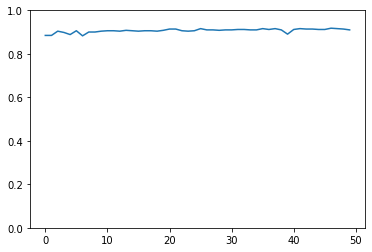

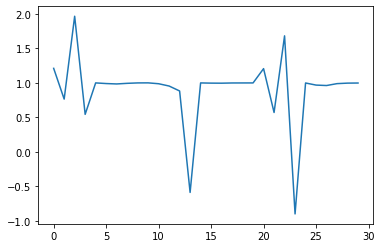

In [93]:
perceptron = Perceptron()
perceptron.fit(X_train.values, Y_train,50,0.0001)
plt.plot(perceptron.w)
plt.show()

Prediction & Accuracy on Training Data

In [66]:
y_pred_train=perceptron.predict(X_train.values)
print(accuracy_score(y_pred_train,Y_train))

0.86328125


Prediction & Accuracy on Test Data

In [95]:
y_pred_test=perceptron.predict(X_test.values)
print(accuracy_score(y_pred_test,Y_test))

0.9473684210526315


Plot the weights

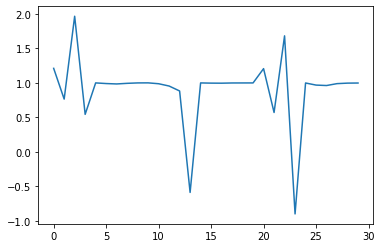

In [96]:
plt.plot(perceptron.w)
plt.show()